In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_ionq import IonQProvider
from math import pi
import os

In [2]:
provider = IonQProvider(
    url="https://api.ionq.co/v0.3",
    token=os.getenv("IONQ_API_TOKEN"),
)
backend = provider.get_backend("ionq_simulator")

/opt/homebrew/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


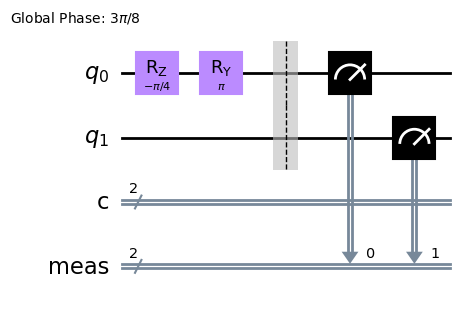

In [3]:
qc1 = QuantumCircuit(2, 2, name="2 registers")
qc1.u(pi, pi / 2, pi / 4, 0)
qc1.measure_all()
qc1 = transpile(qc1, backend)

qc1.draw('mpl')

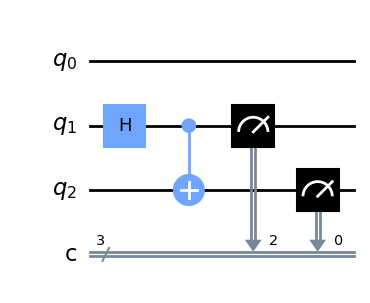

In [4]:
qc2 = QuantumCircuit(3, 3, name="inverted measurements")
qc2.h(1)
qc2.cx(1, 2)
qc2.measure([1, 2], [2, 0])

qc2.draw('mpl')

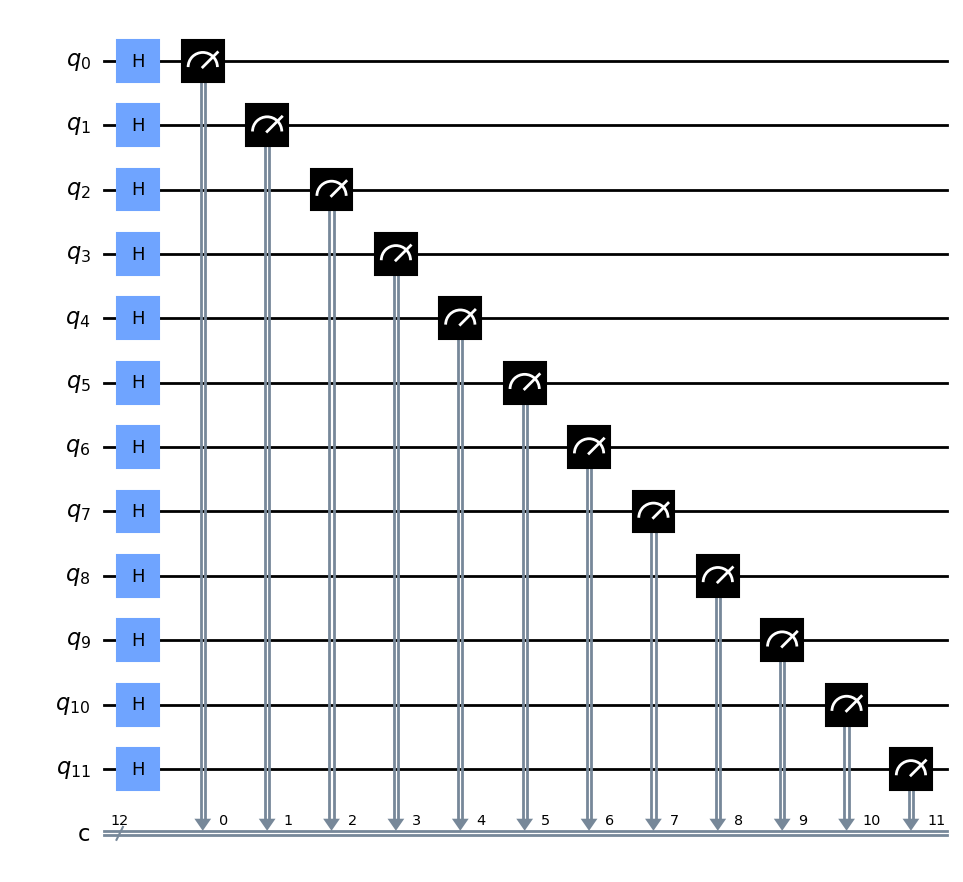

In [5]:
bigboy = QuantumCircuit(12, 12, name="big boy circuit sr. esq.")
bigboy.h(range(12))
bigboy.measure(range(12), range(12))

bigboy.draw('mpl')

In [6]:
job = backend.run(qc1)
multijob = backend.run([qc1, qc2])

{
  "target": "simulator",
  "shots": 1024,
  "name": "2 registers",
  "input": {
    "format": "ionq.circuit.v0",
    "gateset": "qis",
    "qubits": 2,
    "circuit": [
      {
        "gate": "rz",
        "targets": [
          0
        ],
        "rotation": -0.7853981633974474
      },
      {
        "gate": "ry",
        "targets": [
          0
        ],
        "rotation": 3.141592653589793
      }
    ]
  },
  "metadata": {
    "shots": "1024",
    "sampler_seed": "None",
    "qiskit_header": "H4sIACrPuWUC/12OwQrDIBBEf0U8h6KS1qa/EoJokFTQWt3k0Jb+e1cLwfa2M7yZ2RcNNsT8UODjCvRC+o7QxUejvbpfNVi0+IHLMxuk6I9sOHEpELmptBlXE1XqUEgqSLaLg9VmoGjPqBS4py3cONIZTTF1ZMRVDVVMBfNYpbw21jcgq2C5eBthreA1n/5m0t5cn/xpTntF+ubfHyerv0EDAQAA"
  },
  "registers": {
    "meas_mapped": [
      null,
      null,
      0,
      1
    ]
  },
  "noise": {
    "model": "ideal",
    "seed": null
  }
}
res.json()={'id': 'bac6a4cf-4dd6-4fc0-adae-891d54b59e75', 'status': 'ready', 'request': 1706676010}
{
  "target":

In [7]:
print(job.get_counts(), "\n\n---\n")
print(multijob.get_counts())

req_path='https://api.ionq.co/v0.3/jobs/bac6a4cf-4dd6-4fc0-adae-891d54b59e75', res.text='{"id":"bac6a4cf-4dd6-4fc0-adae-891d54b59e75","name":"2 registers","status":"submitted","target":"simulator","metadata":{"shots":"1024","sampler_seed":"None","qiskit_header":"H4sIACrPuWUC/12OwQrDIBBEf0U8h6KS1qa/EoJokFTQWt3k0Jb+e1cLwfa2M7yZ2RcNNsT8UODjCvRC+o7QxUejvbpfNVi0+IHLMxuk6I9sOHEpELmptBlXE1XqUEgqSLaLg9VmoGjPqBS4py3cONIZTTF1ZMRVDVVMBfNYpbw21jcgq2C5eBthreA1n/5m0t5cn/xpTntF+ubfHyerv0EDAQAA"},"gate_counts":{},"request":1706676010,"registers":{"meas_mapped":[null,null,0,1]},"noise":{"model":"ideal"},"error_mitigation":{"debias":false},"settings":{"compilation":{"fractional":true}},"children":[]}'
req_path='https://api.ionq.co/v0.3/jobs/bac6a4cf-4dd6-4fc0-adae-891d54b59e75', res.text='{"id":"bac6a4cf-4dd6-4fc0-adae-891d54b59e75","name":"2 registers","status":"completed","target":"simulator","metadata":{"shots":"1024","sampler_seed":"None","qiskit_header":"H4sIACrPuWUC/12OwQrDIBBEf0U8h6KS1qa/EoJokFTQ

ValueError: dictionary update sequence element #0 has length 1; 2 is required